In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
import copy 
import sys 

# -------fitness functions---------

# rastrigin function
def fitness_firefly_rastrigin(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
    return fitness_value


# sphere function
def fitness_firefly_sphere(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi * xi);
    return fitness_value;


# Three-hump camel function 2*(x*2))-(1.05(x*4))+((x6)/6)+(x*y)+(y*2)
def firefly_Three_hump(position):
    x = position[0]
    y = position[1]
    fitness_value = (2*(x**2)) - (1.05*(x**4)) + ((x**6)/6) + (x*y)+(y**2)
    
    return fitness_value


# Beale function
def firefly_Beale(position):
    x = position[0]
    y = position[1]
    fitness_value = (1.5 -x + x*y )**2 + (2.25- x+ x*(y**2) )**2 + (2.625 - x + x*(y**3))**2
    
    return fitness_value


# -------------------------


# firefly class
class firefly:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for i in range(dim)]
        for i in range(dim):
            self.position[i] = ((maxx - minx) * self.rnd.random() + minx)

        self.fitness = fitness(self.position) # curr fitness


# firefly optimization algorithm (FA)
def firefly_algorithm(fitness, max_iter, n, dim, minx, maxx):
    rnd = random.Random(0)
    position_list=[]
    fitness_list=[]
    fireflyPop_list=[]

    # create n random fireflies
    fireflyPopulation = [firefly(fitness, dim, minx, maxx, i) for i in range(n)]
    fireflyPop_list.append([p.position for p in fireflyPopulation])

    # compute the value of best_position and best_fitness in the firefly Population
    Xbest = [0.0 for i in range(dim)]
    Fbest = sys.float_info.max

    for i in range(n): # check each firefly
        if fireflyPopulation[i].fitness < Fbest:
            Fbest = fireflyPopulation[i].fitness
            Xbest = copy.copy(fireflyPopulation[i].position)

    position_list.append(Xbest)
    fitness_list.append(Fbest)

    # main loop of FA
    for Iter in range(max_iter):
        # after every 10 iterations
        # print iteration number and best fitness value so far
        if Iter % 10 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.3f" % Fbest)

        for i in range(n):
            for j in range(n):
                if fireflyPopulation[i].fitness < fireflyPopulation[j].fitness:
                    r = np.linalg.norm(np.array(fireflyPopulation[i].position) - np.array(fireflyPopulation[j].position))
                    beta = 1.0
                    gamma = 1.0
                    # update position of firefly i
                    for k in range(dim):
                        ri = rnd.random()
                        new_pos = fireflyPopulation[i].position[k] + beta * math.exp(-gamma * (r**2)) * (fireflyPopulation[j].position[k] - fireflyPopulation[i].position[k]) + ri * (1 - math.exp(-gamma * (r**2))) * (Xbest[k] - fireflyPopulation[i].position[k])
                        fireflyPopulation[i].position[k] = new_pos

        for i in range(n):
            # if Xnew < minx OR Xnew > maxx
            # then clip it
            for j in range(dim):
                fireflyPopulation[i].position[j] = max(fireflyPopulation[i].position[j], minx)
                fireflyPopulation[i].position[j] = min(fireflyPopulation[i].position[j], maxx)

            fireflyPopulation[i].fitness = fitness(fireflyPopulation[i].position)

            if fireflyPopulation[i].fitness < Fbest:
                Xbest = copy.copy(fireflyPopulation[i].position)
                Fbest = fireflyPopulation[i].fitness

        position_list.append(Xbest)
        fitness_list.append(Fbest)
        fireflyPop_list.append([p.position for p in fireflyPopulation])

    # returning the best solution
    return Xbest, position_list, fitness_list, fireflyPop_list


# ----------------------------


# Driver code for rastrigin function
print("\nBegin firefly algorithm on rastrigin function\n")
dim = 3
fitness = fitness_firefly_rastrigin

print("Goal is to minimize function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim - 1):
    print("0, ", end="")
print("0)")

num_fireflies = 50
max_iter = 100

Xbest, position_list1, fitness_list1, fireflyPop_list1 = firefly_algorithm(fitness, max_iter, num_fireflies, dim, -10.0, 10.0)

print("\nDone\nBest solution found:")
for i in range(dim):
    print("X[" + str(i) + "] = %.6f" % Xbest[i])
print("Fitness value of best solution = %.6f" % fitness(Xbest))


# Driver code for sphere function
print("\nBegin firefly algorithm on sphere function\n")
dim = 4
fitness = fitness_firefly_sphere

print("Goal is to minimize function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim - 1):
    print("0, ", end="")
print("0)")

num_fireflies = 50
max_iter = 100

Xbest, position_list2, fitness_list2, fireflyPop_list2 = firefly_algorithm(fitness, max_iter, num_fireflies, dim, -10.0, 10.0)

print("\nDone\nBest solution found:")
for i in range(dim):
    print("X[" + str(i) + "] = %.6f" % Xbest[i])
print("Fitness value of best solution = %.6f" % fitness(Xbest))


# Driver code for Three-hump Camel function
print("\nBegin firefly algorithm on Three-hump Camel function\n")
dim = 2
fitness = firefly_Three_hump

print("Goal is to minimize function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (0, 0)")

num_fireflies = 50
max_iter = 100

Xbest, position_list3, fitness_list3, fireflyPop_list3 = firefly_algorithm(fitness, max_iter, num_fireflies, dim, -5.0, 5.0)

print("\nDone\nBest solution found:")
for i in range(dim):
    print("X[" + str(i) + "] = %.6f" % Xbest[i])
print("Fitness value of best solution = %.6f" % fitness(Xbest))


# Driver code for Beale function
print("\nBegin firefly algorithm on Beale function\n")
dim = 2
fitness = firefly_Beale

print("Goal is to minimize function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (3, 0.5)")

num_fireflies = 50
max_iter = 100

Xbest, position_list4, fitness_list4, fireflyPop_list4 = firefly_algorithm(fitness, max_iter, num_fireflies, dim, -4.5, 4.5)

print("\nDone\nBest solution found:")
for i in range(dim):
    print("X[" + str(i) + "] = %.6f" % Xbest[i])
print("Fitness value of best solution = %.6f" % fitness(Xbest))


Begin firefly algorithm on rastrigin function

Goal is to minimize function in 3 variables
Function has known min = 0.0 at (0, 0, 0)
Iter = 10 best fitness = 23.911
Iter = 20 best fitness = 23.911
Iter = 30 best fitness = 23.911
Iter = 40 best fitness = 23.911
Iter = 50 best fitness = 23.910
Iter = 60 best fitness = 23.910
Iter = 70 best fitness = 23.910
Iter = 80 best fitness = 23.910
Iter = 90 best fitness = 23.910

Done
Best solution found:
X[0] = -2.354093
X[1] = 0.961806
X[2] = -1.014782
Fitness value of best solution = 23.910211

Begin firefly algorithm on sphere function

Goal is to minimize function in 4 variables
Function has known min = 0.0 at (0, 0, 0, 0)
Iter = 10 best fitness = 3.646
Iter = 20 best fitness = 3.646
Iter = 30 best fitness = 3.646
Iter = 40 best fitness = 3.646
Iter = 50 best fitness = 3.646
Iter = 60 best fitness = 3.646
Iter = 70 best fitness = 3.646
Iter = 80 best fitness = 3.646
Iter = 90 best fitness = 3.646

Done
Best solution found:
X[0] = -0.406928
X

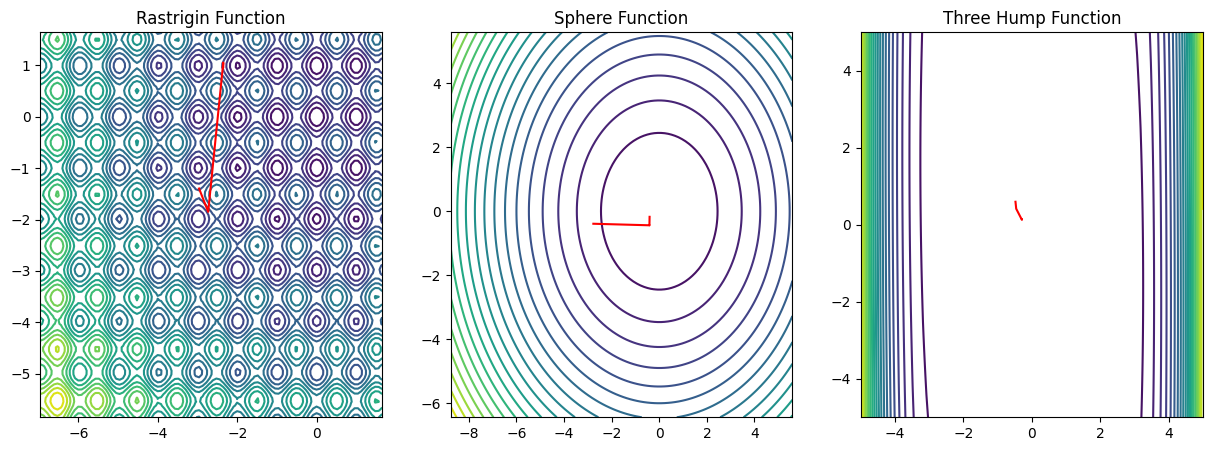

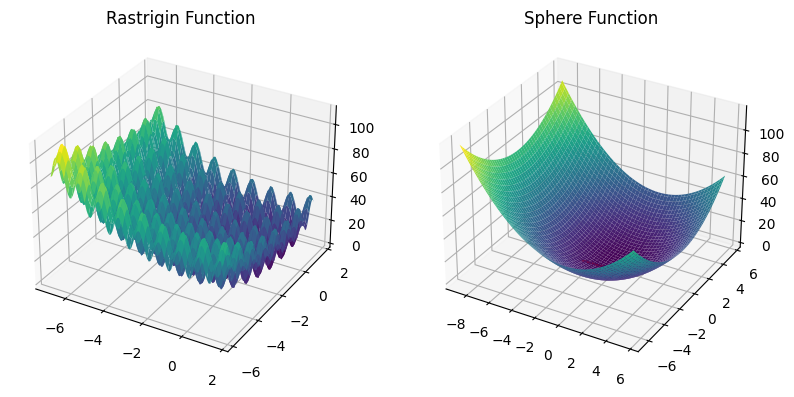

In [19]:
import numpy as np 
import matplotlib.pyplot as plt

def rastrigin(x, y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def sphere(x, y):
    return x**2 + y**2


def ThreeHump (x, y):
    return (2*(x**2)) - (1.05*(x**4)) + ((x**6)/6) + (x*y)+(y**2)  

def Beale(x,y):
    return (1.5 -x + x*y )**2 + (2.25- x+ x*(y**2) )**2 + (2.625 - x + x*(y**3))**2  

def test_fun(x, y):
    return (x-2)**2+(y-4)**2  

# 2D plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  
fig3 = plt.figure(figsize=(15, 5))

#--------------------------------------------- Rastrigin Function --------------------
#1

x_up =[ i[0] for i in position_list1 ]
y_up=[ i[1] for i in position_list1]
z_up=[ i[2] for i in position_list1 ]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(xmin-4,xmax +4 , 100)
y = np.linspace(ymin-4,xmax +4, 100)
X, Y = np.meshgrid(x, y)
axs[0].contour(X, Y, rastrigin(X, Y), levels=20)
axs[0].plot(x_up, y_up,color = 'r')
axs[0].set_title("Rastrigin Function")
axs[0].set_xlabel('')

#3D plots
ax = fig3.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, rastrigin(X, Y), cmap='viridis')
ax.plot(x_up, y_up,z_up,color = 'r')
ax.set_title("Rastrigin Function")

#--------------------------------------------- Sphere Function --------------------
#2

x_up =[ i[0] for i in position_list2]
y_up=[ i[1] for i in position_list2]
z_up=[ i[2] for i in position_list2]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(xmin-6,xmax +6 , 100)
y = np.linspace(ymin-6,xmax +6, 100)
X, Y = np.meshgrid(x, y)
axs[1].contour(X, Y, sphere(X, Y), levels=20)
axs[1].plot(x_up, y_up,color = 'r')
axs[1].set_title("Sphere Function")

#3D plots
ax = fig3.add_subplot(132, projection='3d')
ax.plot_surface(X, Y, sphere(X, Y), cmap='viridis')
ax.plot(x_up, y_up,z_up,color = 'r')
ax.set_title("Sphere Function")

#--------------------------------------------- Three Hump Function --------------------
#3

x_up =[ i[0] for i in position_list3]
y_up=[ i[1] for i in position_list3]
#z_up=[ i[2] for i in position_list3]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(-5,5 , 100)
y = np.linspace(-5,5, 100)
X, Y = np.meshgrid(x, y)

axs[2].contour(X, Y, ThreeHump(X, Y), levels=20)
axs[2].plot(x_up, y_up,color = 'r')
axs[2].set_title("Three Hump Function")
"""
#3D plots
ax = fig3.add_subplot(133, projection='3d')
ax.plot_surface(X, Y, ThreeHump(X, Y), cmap='viridis')
ax.plot(x_up, y_up,z_up,color = 'r')
ax.set_title("Three Hump Function")
"""
plt.show()


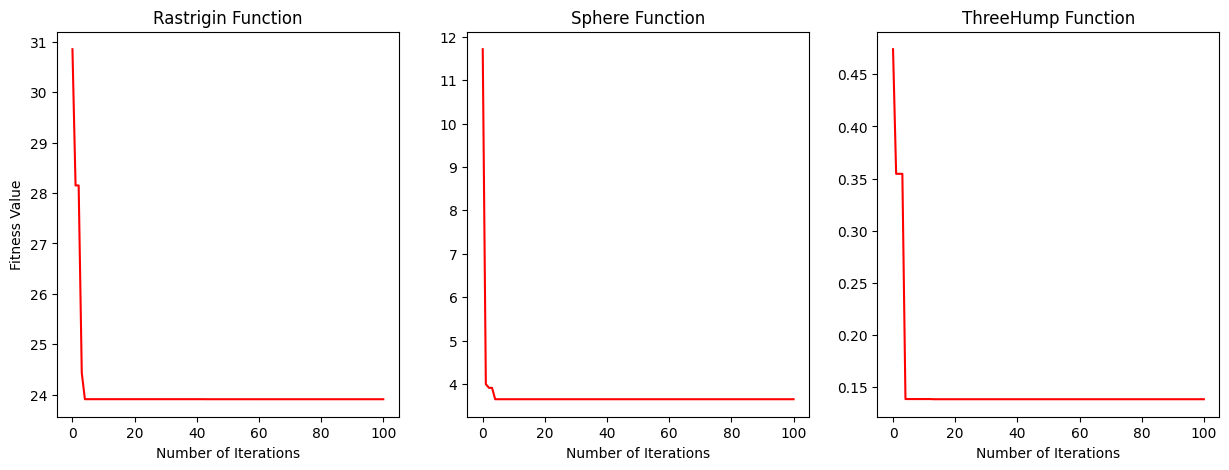

In [20]:
# fitness 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(fitness_list1,color = 'r')
axs[0].set_title("Rastrigin Function")
axs[0].set_ylabel('Fitness Value')
axs[0].set_xlabel('Number of Iterations')


axs[1].plot(fitness_list2,color = 'r')
axs[1].set_title("Sphere Function")
# axs[1].set_xlabel('Fitness Value')
axs[1].set_xlabel('Number of Iterations')


axs[2].plot(fitness_list3,color = 'r')
axs[2].set_title("ThreeHump Function")
# axs[2].set_xlabel('Fitness Value')
axs[2].set_xlabel('Number of Iterations')

plt.show()